In [2]:
import logging
from pathlib import Path
import math

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL.ImageDraw import Draw


folder = Path(r"E:\Dropbox\Watercolor Animation Assets")
output_folder = folder / "SkinMatte/Comp 2/outputs/run5_test"
matte_path = folder / "SkinMatte/Comp 2/Comp 2_00000.jpg"
brush_pattern = folder / "brushes/*.png"

logging.basicConfig(level=logging.INFO)
plt.rcParams['figure.figsize'] = [12, 8]

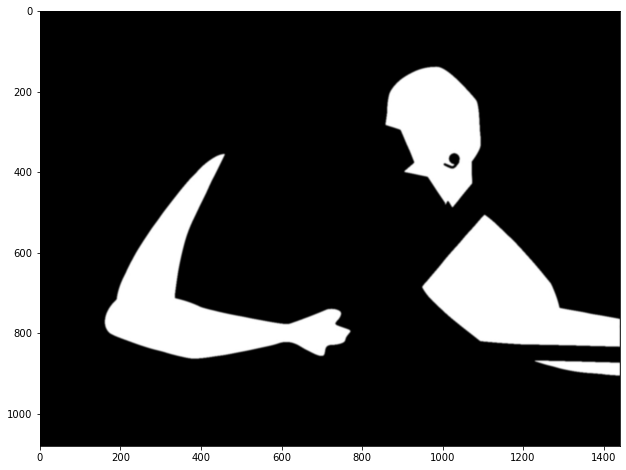

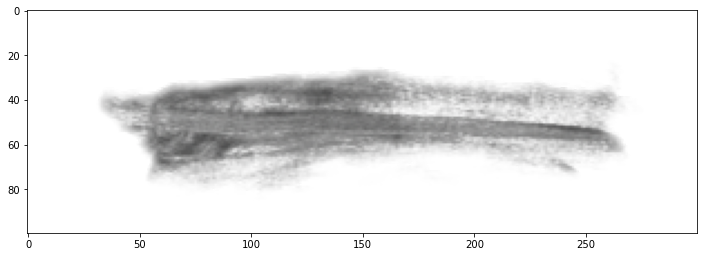

In [5]:
matte_image = Image.open(matte_path)
plt.imshow(matte_image)
plt.show()
brush_image = Image.open(folder / "BRUSHES/PaintStrokes (0-00-00-04).png")
plt.imshow(brush_image)
plt.show()

In [14]:
image = matte_image.copy()
image.paste(brush_image,(150,650),brush_image)
image.paste(brush_image,(150,660),brush_image)
image.paste(brush_image,(150,670),brush_image)

image.show()

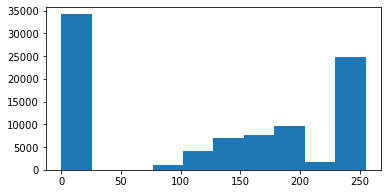

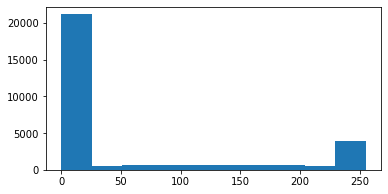

In [19]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.hist(np.array(brush_image)[:,:,0:-1].flatten())
plt.show()
plt.hist(np.array(brush_image)[:,:,-1].flatten())
plt.show()

In [23]:
# Find darkness of each RGB pixel (averge, rounded)
darkness = Image.fromarray(np.array(brush_image)[:,:,0:-1].mean(axis=-1))
darkness.show()


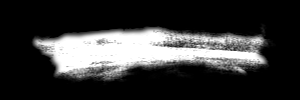

In [73]:
trans0 = Image.fromarray(np.array(brush_image)[:,:,3])
trans0

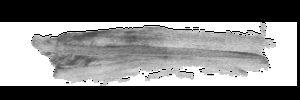

In [29]:
from PIL import Image, ImageOps
gray = ImageOps.grayscale(brush_image)
gray

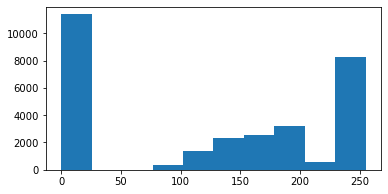

In [31]:
plt.hist(np.array(gray).flatten())
plt.show()

In [35]:
256-np.array(gray)

array([[256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       ...,
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256]], dtype=uint16)

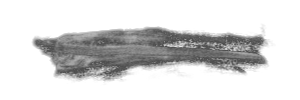

In [51]:
Image.fromarray(255-np.minimum(np.array(gray),np.array(trans0)))
#np.min(
#Image.fromarray(

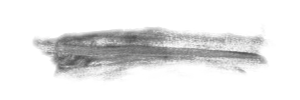

In [52]:
brush_image

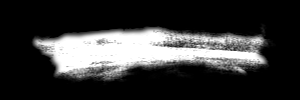

In [55]:
alpha = brush_image.getchannel("A")
alpha

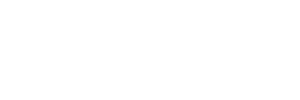

In [67]:
bg = Image.new("RGBA",brush_image.size,255)
bg

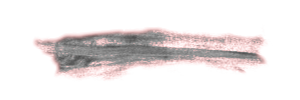

In [68]:
bg.paste(brush_image,mask=alpha)
bg

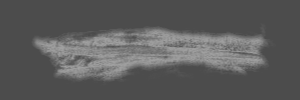

In [70]:
ImageOps.grayscale(bg)

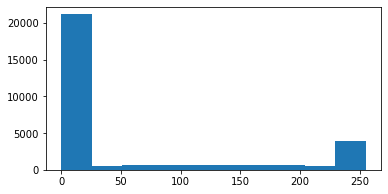

In [61]:
plt.hist(np.array(brush_image)[:,:,-1].flatten())
plt.show()

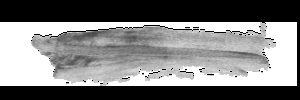

In [63]:
brush_image.convert("RGB")

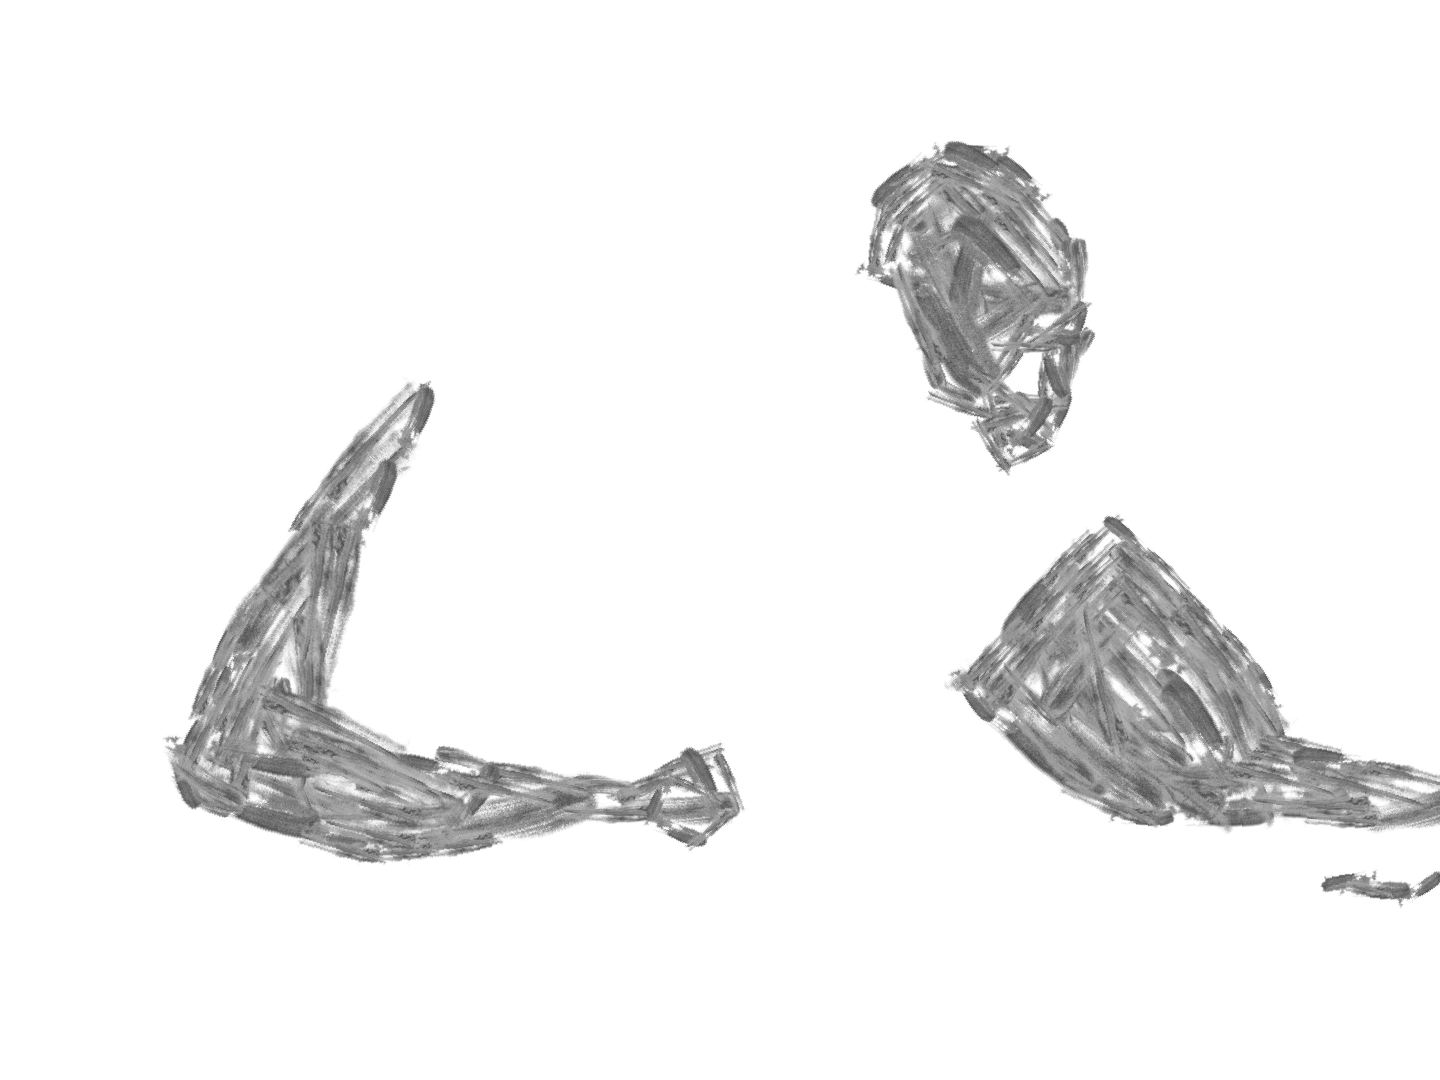

In [3]:
sample = Image.open(r"E:\Dropbox\Watercolor Animation Assets\SkinMatte\Comp 2\outputs\cmk12\Comp 2_00000.output.png")
sample

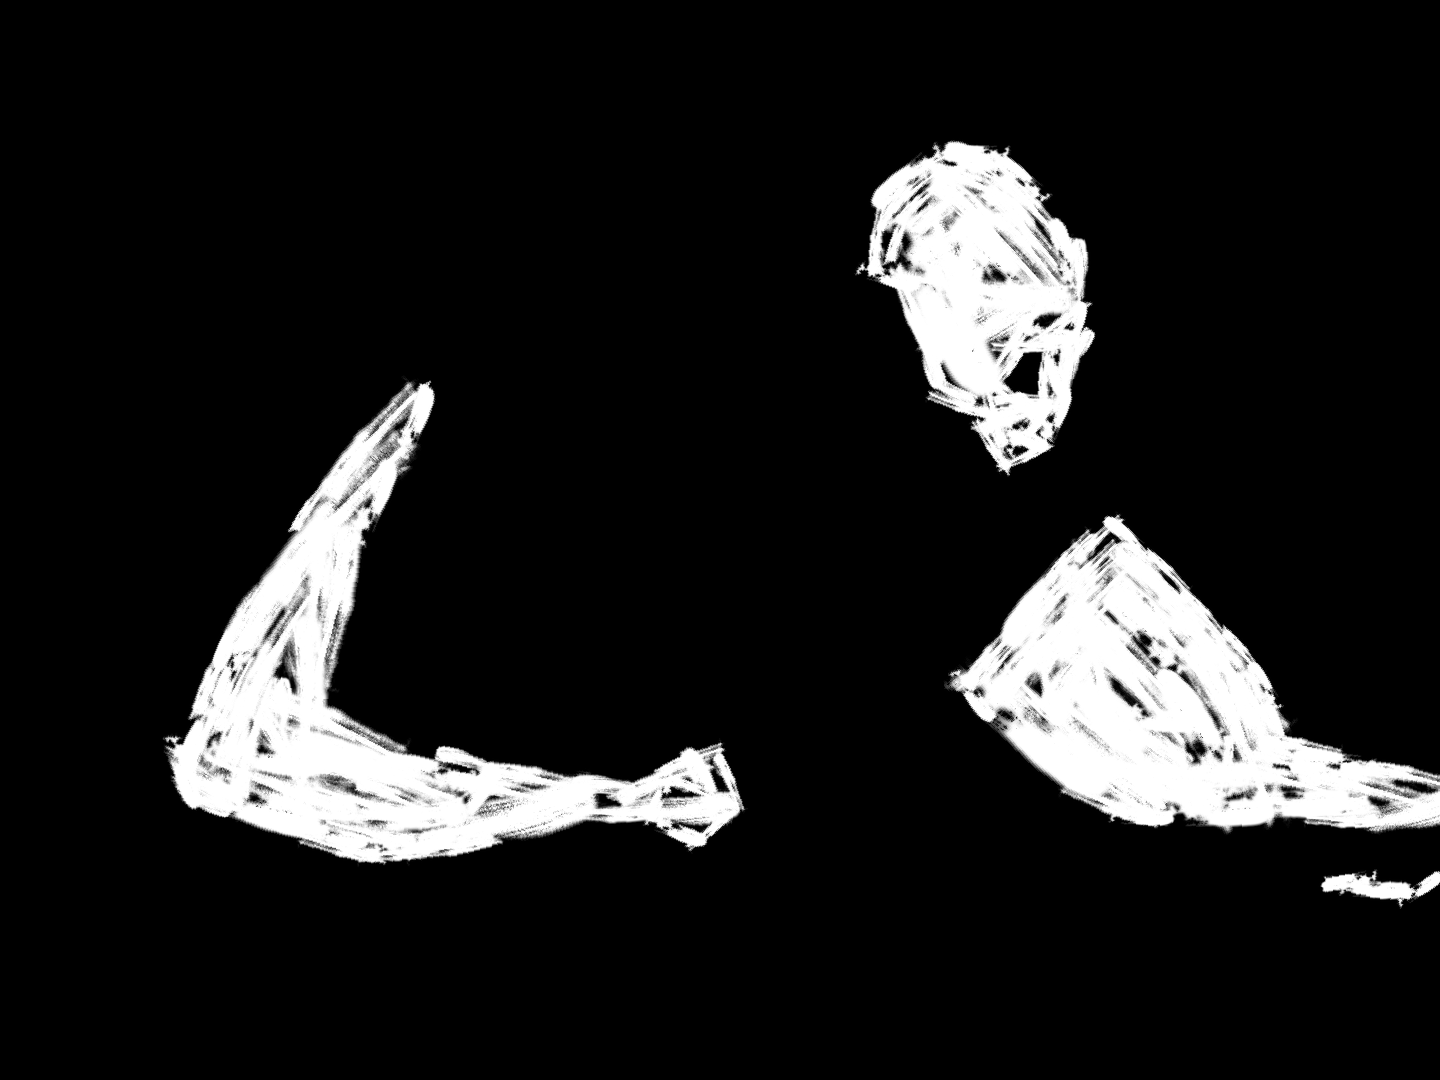

In [5]:
sample.getchannel("A")

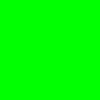

In [104]:
fulldark = Image.new("RGBA",(100,100),(0,255,0,255))
fulldark

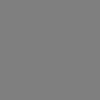

In [105]:
semidark = Image.new("RGBA",(100,100),(0,0,0,127))
semidark

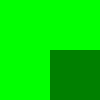

In [108]:
result = fulldark.copy()
result.alpha_composite(semidark,dest=(50,50))#,source=(10,10,30,50))
result

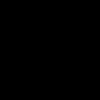

In [80]:
semidark.paste(fulldark)
semidark

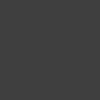

In [89]:
result = fulldark.copy()
result.paste(semidark,mask=semidark.getchannel("A"))
result